In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
#Checking Duplicated rows
df.duplicated().sum()

0

In [7]:
#Droppig id column which is of no use
df.drop(columns='id',axis=1,inplace=True)

In [8]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


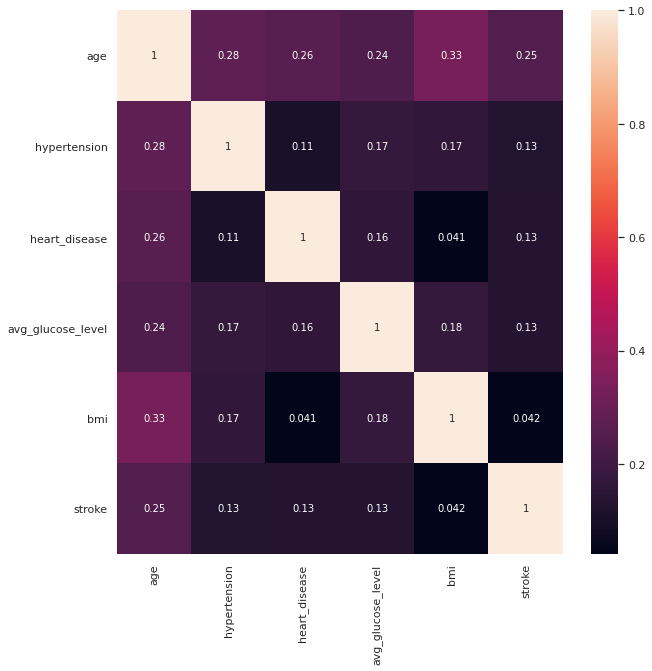

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

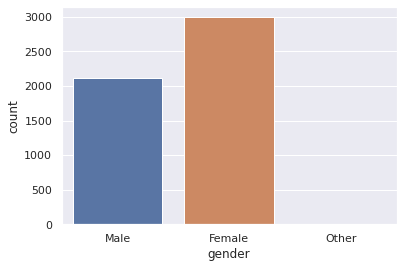

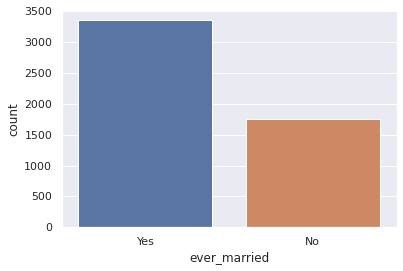

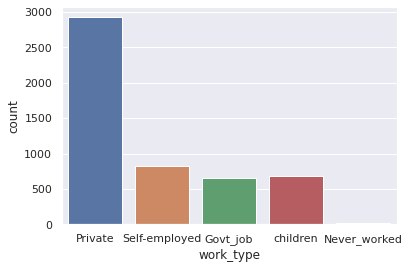

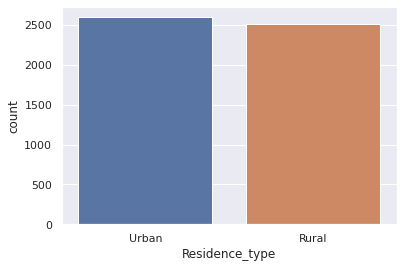

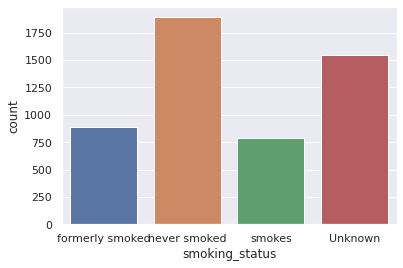

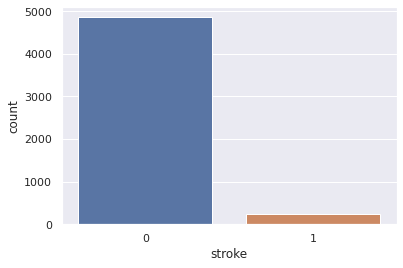

In [13]:
#Data Visualization
data_vis = ['gender','ever_married','work_type','Residence_type','smoking_status','stroke']
for i in data_vis:
  sns.countplot(x=i,data=df)
  plt.show()

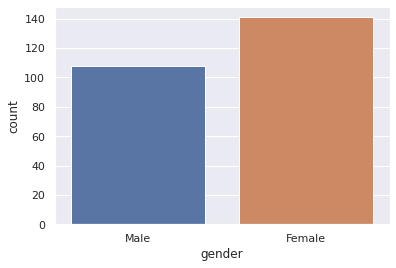

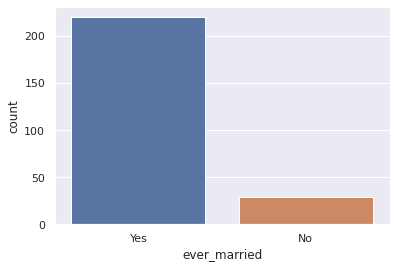

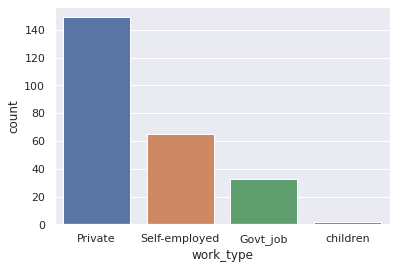

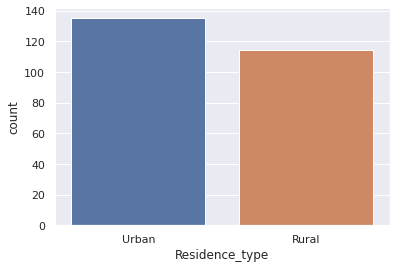

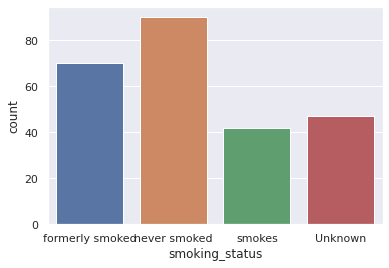

In [15]:
#People having stroke 
people_stroke = df[df['stroke']==1] 
for i in data_vis[:-1]:
  sns.countplot(x=i,data=people_stroke)
  plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


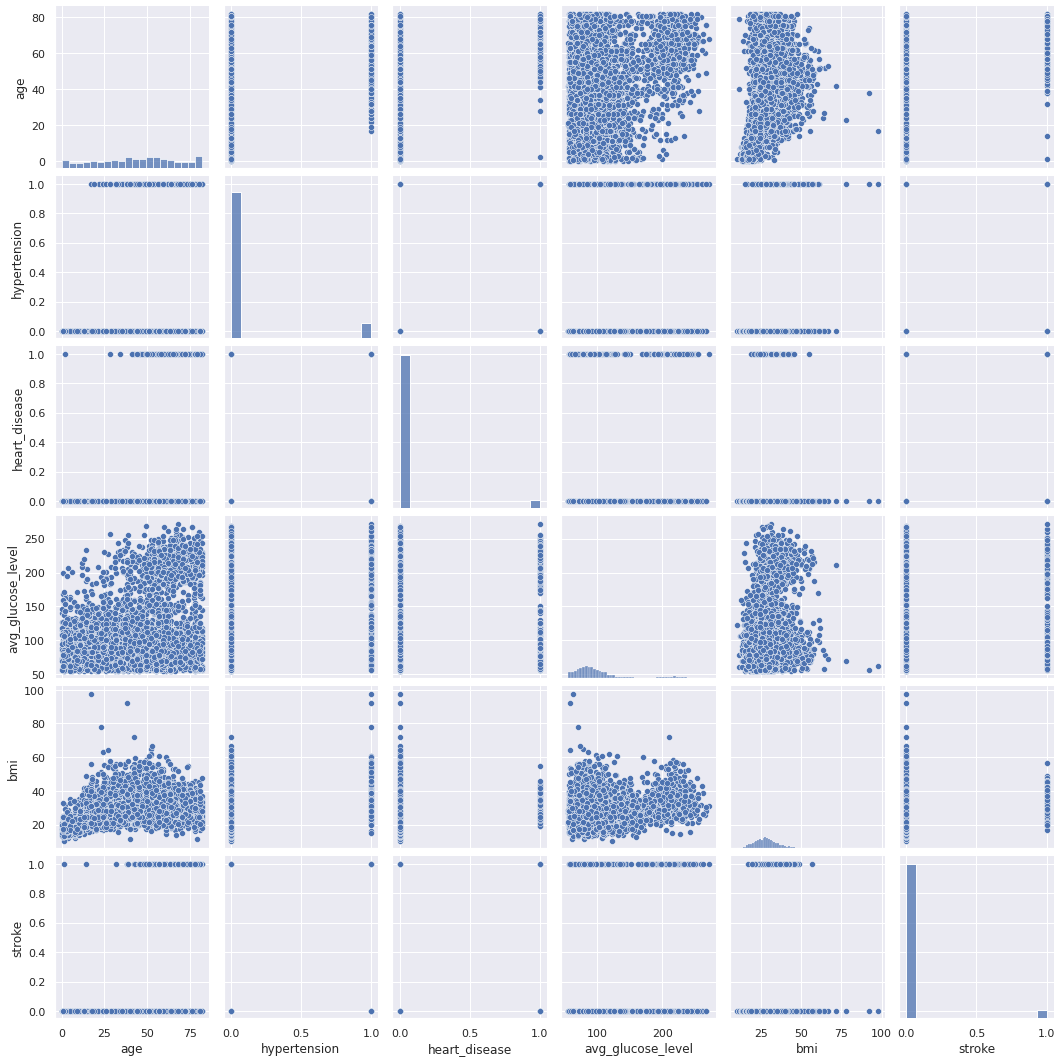

In [17]:
sns.pairplot(df)

In [18]:
#Filling missing bmi values
df['bmi'].fillna(df['bmi'].mean(),inplace=True)

In [19]:
#We will treat Unknown smoking_status as NaN value
df['smoking_status'] = df['smoking_status'].replace('Unknown',np.nan)

In [20]:
df.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                     0
smoking_status       1544
stroke                  0
dtype: int64

In [21]:
df['smoking_status'].fillna(df['smoking_status'].mode()[0],inplace=True)

In [22]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

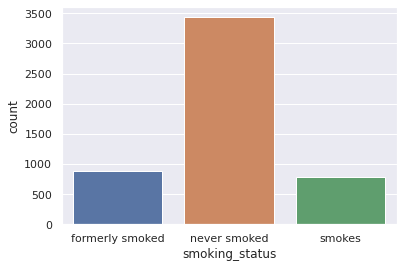

In [23]:
sns.countplot(x='smoking_status',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


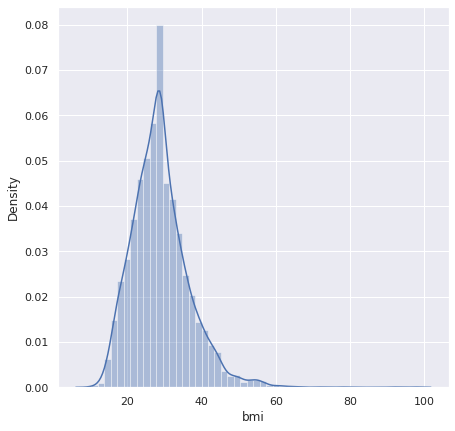

In [28]:
plt.figure(figsize=(7,7))
sns.distplot(df['bmi'])

In [29]:
#Splitting into dependent and independent variables
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [30]:
#OneHotEncoding columns
x=pd.get_dummies(data=x,columns=['gender','ever_married','work_type','Residence_type','smoking_status'],drop_first=True)

In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          5110 non-null   float64
 1   hypertension                 5110 non-null   int64  
 2   heart_disease                5110 non-null   int64  
 3   avg_glucose_level            5110 non-null   float64
 4   bmi                          5110 non-null   float64
 5   gender_Male                  5110 non-null   uint8  
 6   gender_Other                 5110 non-null   uint8  
 7   ever_married_Yes             5110 non-null   uint8  
 8   work_type_Never_worked       5110 non-null   uint8  
 9   work_type_Private            5110 non-null   uint8  
 10  work_type_Self-employed      5110 non-null   uint8  
 11  work_type_children           5110 non-null   uint8  
 12  Residence_type_Urban         5110 non-null   uint8  
 13  smoking_status_nev

In [32]:
#Converting age to int as all values are in perfect int format
x['age']=x['age'].astype('int')

In [33]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          5110 non-null   int64  
 1   hypertension                 5110 non-null   int64  
 2   heart_disease                5110 non-null   int64  
 3   avg_glucose_level            5110 non-null   float64
 4   bmi                          5110 non-null   float64
 5   gender_Male                  5110 non-null   uint8  
 6   gender_Other                 5110 non-null   uint8  
 7   ever_married_Yes             5110 non-null   uint8  
 8   work_type_Never_worked       5110 non-null   uint8  
 9   work_type_Private            5110 non-null   uint8  
 10  work_type_Self-employed      5110 non-null   uint8  
 11  work_type_children           5110 non-null   uint8  
 12  Residence_type_Urban         5110 non-null   uint8  
 13  smoking_status_nev

In [34]:
#Splitting Dataset into training and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=26)

In [35]:
#Scaling data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [49]:
#Model Building
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state = 99)
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=99, shrinking=True, tol=0.001,
    verbose=False)

In [50]:
y_pred = classifier.predict(x_test)

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)
print('Accuracy Score:',accuracy_score(y_test,y_pred)*100)
print('Classification Report:')
print(classification_report(y_test,y_pred))

Confusion Matrix:
[[1216    0]
 [  62    0]]
Accuracy Score: 95.14866979655712
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      1216
           1       0.00      0.00      0.00        62

    accuracy                           0.95      1278
   macro avg       0.48      0.50      0.49      1278
weighted avg       0.91      0.95      0.93      1278



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [52]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 95.12 %
Standard Deviation: 0.12 %
